In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import glob
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os

In [6]:
'''!mkdir /content/drive/MyDrive/AKSARA/Jawa_/'''

In [7]:
'''daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Jawa/*')
ori = [_+"/"+_.split('/')[-1]+'.png' for _ in daftar_huruf]
for ah in ori:
  os.mkdir("/content/drive/MyDrive/AKSARA/Jawa_/"+ah.split('/')[-1].split('.')[0])
  shutil.move(ah, "/content/drive/MyDrive/AKSARA/Jawa_/"+ah.split('/')[-1].split('.')[0]+'/'+ah.split('/')[-1].split('.')[0]+'.png')'''

In [8]:
'''!rm -rf /content/drive/MyDrive/AKSARA/Jawa/'''

In [10]:
'''!mv /content/drive/MyDrive/AKSARA/Jawa_/ /content/drive/MyDrive/AKSARA/Jawa/'''

In [11]:
daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Jawa/*')
daftar_huruf_nama = [_+"/"+_.split('/')[-1]+".png" for _ in daftar_huruf]
daftar_huruf_kosong = []

for nama in daftar_huruf_nama:
  _ = cv2.imread(nama)
  print(nama.split('/')[-1], np.sum(255-_))

  if np.sum(255-_)==0:
    daftar_huruf_kosong.append(nama.split('/')[-1].split('.')[0])

JAVANESE_CONSONANT_SIGN_CAKRA.png 5951292
JAVANESE_CONSONANT_SIGN_KERET.png 285798
JAVANESE_CONSONANT_SIGN_PENGKAL.png 14183046
JAVANESE_DIGIT_EIGHT.png 13458588
JAVANESE_DIGIT_FIVE.png 17546922
JAVANESE_DIGIT_FOUR.png 8465502
JAVANESE_DIGIT_NINE.png 18590670
JAVANESE_DIGIT_ONE.png 11760906
JAVANESE_DIGIT_SEVEN.png 15886899
JAVANESE_DIGIT_SIX.png 8064447
JAVANESE_DIGIT_THREE.png 35525226
JAVANESE_DIGIT_TWO.png 25554696
JAVANESE_DIGIT_ZERO.png 7101693
JAVANESE_LEFT_RERENGGAN.png 22659288
JAVANESE_LETTER_AI.png 10318773
JAVANESE_LETTER_A.png 18515754
JAVANESE_LETTER_BA.png 16719252
JAVANESE_LETTER_BA_MURDA.png 11548584
JAVANESE_LETTER_CA.png 15437739
JAVANESE_LETTER_CA_MURDA.png 22426440
JAVANESE_LETTER_DA.png 15490692
JAVANESE_LETTER_DA_MAHAPRANA.png 14202084
JAVANESE_LETTER_DDA.png 13515483
JAVANESE_LETTER_DDA_MAHAPRANA.png 10536279
JAVANESE_LETTER_E.png 8075829
JAVANESE_LETTER_GA.png 11834889
JAVANESE_LETTER_GA_MURDA.png 17560995
JAVANESE_LETTER_HA.png 15901509
JAVANESE_LETTER_II.png 

In [12]:
def autoCrop(this_image):
    image_data_bw = this_image.max(axis=2)
    non_empty_columns = np.where(image_data_bw.min(axis=0)<0.2)[0]
    non_empty_rows = np.where(image_data_bw.min(axis=1)<0.2)[0]
    cropBox = (min(non_empty_rows), max(non_empty_rows), min(non_empty_columns), max(non_empty_columns))

    image_data_new = this_image[cropBox[0]:cropBox[1]+1, cropBox[2]:cropBox[3]+1 , :]
    
    return image_data_new

In [13]:
daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Jawa/*')
daftar_huruf_nama = [_+"/"+_.split('/')[-1]+".png" for _ in daftar_huruf]
daftar_huruf_kosong = []

for nama in daftar_huruf_nama:
  _ = cv2.imread(nama)
  print(nama.split('/')[-1], np.sum(255-_))
  _ = autoCrop(_)
  cv2.imwrite(nama, _)

JAVANESE_CONSONANT_SIGN_CAKRA.png 5951292
JAVANESE_CONSONANT_SIGN_KERET.png 285798
JAVANESE_CONSONANT_SIGN_PENGKAL.png 14183046
JAVANESE_DIGIT_EIGHT.png 13458588
JAVANESE_DIGIT_FIVE.png 17546922
JAVANESE_DIGIT_FOUR.png 8465502
JAVANESE_DIGIT_NINE.png 18590670
JAVANESE_DIGIT_ONE.png 11760906
JAVANESE_DIGIT_SEVEN.png 15886899
JAVANESE_DIGIT_SIX.png 8064447
JAVANESE_DIGIT_THREE.png 35525226
JAVANESE_DIGIT_TWO.png 25554696
JAVANESE_DIGIT_ZERO.png 7101693
JAVANESE_LEFT_RERENGGAN.png 22659288
JAVANESE_LETTER_AI.png 10318773
JAVANESE_LETTER_A.png 18515754
JAVANESE_LETTER_BA.png 16719252
JAVANESE_LETTER_BA_MURDA.png 11548584
JAVANESE_LETTER_CA.png 15437739
JAVANESE_LETTER_CA_MURDA.png 22426440
JAVANESE_LETTER_DA.png 15490692
JAVANESE_LETTER_DA_MAHAPRANA.png 14202084
JAVANESE_LETTER_DDA.png 13515483
JAVANESE_LETTER_DDA_MAHAPRANA.png 10536279
JAVANESE_LETTER_E.png 8075829
JAVANESE_LETTER_GA.png 11834889
JAVANESE_LETTER_GA_MURDA.png 17560995
JAVANESE_LETTER_HA.png 15901509
JAVANESE_LETTER_II.png 

In [14]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import Augmentor

def perbanyak(ini, sebanyak_ini):
  p = Augmentor.Pipeline(source_directory=ini, output_directory='.')
  p.random_distortion(probability=1, grid_width=2, grid_height=2, magnitude=1)
  p.rotate(probability=0.7, max_left_rotation=6, max_right_rotation=6)
  p.zoom_random(probability=0.7, percentage_area=0.9)
  p.resize(probability=1, width=64, height=64)
  p.sample(sebanyak_ini)

In [17]:
jawa = glob.glob("/content/drive/MyDrive/AKSARA/Jawa/*")

for huruf in jawa:
  perbanyak(huruf, 20)

Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_CONSONANT_SIGN_CAKRA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F210CB100>: 100%|██████████| 20/20 [00:00<00:00, 67.00 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_CONSONANT_SIGN_KERET/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F210D5C40>: 100%|██████████| 20/20 [00:00<00:00, 99.72 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_CONSONANT_SIGN_PENGKAL/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F210E4970>: 100%|██████████| 20/20 [00:00<00:00, 53.62 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_DIGIT_EIGHT/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F210D5DC0>: 100%|██████████| 20/20 [00:00<00:00, 57.86 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_DIGIT_FIVE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F210D5F70>: 100%|██████████| 20/20 [00:00<00:00, 41.81 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_DIGIT_FOUR/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F210CB370>: 100%|██████████| 20/20 [00:00<00:00, 71.78 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_DIGIT_NINE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F21129B80>: 100%|██████████| 20/20 [00:00<00:00, 51.95 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_DIGIT_ONE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F21129970>: 100%|██████████| 20/20 [00:00<00:00, 57.76 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_DIGIT_SEVEN/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F210FD8E0>: 100%|██████████| 20/20 [00:00<00:00, 61.13 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_DIGIT_SIX/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F21129C10>: 100%|██████████| 20/20 [00:00<00:00, 61.88 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_DIGIT_THREE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E079BB0>: 100%|██████████| 20/20 [00:00<00:00, 27.21 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_DIGIT_TWO/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F210F1B80>: 100%|██████████| 20/20 [00:00<00:00, 32.71 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_DIGIT_ZERO/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F210F0880>: 100%|██████████| 20/20 [00:00<00:00, 72.28 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LEFT_RERENGGAN/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E0754C0>: 100%|██████████| 20/20 [00:00<00:00, 28.32 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_AI/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F210F1CA0>: 100%|██████████| 20/20 [00:00<00:00, 42.52 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_A/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E07CF10>: 100%|██████████| 20/20 [00:00<00:00, 41.32 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_BA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F31DF6850>: 100%|██████████| 20/20 [00:00<00:00, 57.08 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_BA_MURDA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E08CA60>: 100%|██████████| 20/20 [00:00<00:00, 66.45 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_CA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E07F1F0>: 100%|██████████| 20/20 [00:00<00:00, 54.99 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_CA_MURDA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E076190>: 100%|██████████| 20/20 [00:00<00:00, 50.48 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_DA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E0754C0>: 100%|██████████| 20/20 [00:00<00:00, 58.73 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_DA_MAHAPRANA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E08CE20>: 100%|██████████| 20/20 [00:00<00:00, 56.98 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_DDA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F210E4130>: 100%|██████████| 20/20 [00:00<00:00, 57.84 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_DDA_MAHAPRANA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E08CE20>: 100%|██████████| 20/20 [00:00<00:00, 65.93 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_E/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E0A5460>: 100%|██████████| 20/20 [00:00<00:00, 53.63 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_GA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E08F9A0>: 100%|██████████| 20/20 [00:00<00:00, 52.50 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_GA_MURDA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E09F9D0>: 100%|██████████| 20/20 [00:00<00:00, 43.45 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_HA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E08F9A0>: 100%|██████████| 20/20 [00:00<00:00, 49.69 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_II/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E0308B0>: 100%|██████████| 20/20 [00:00<00:00, 40.09 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_I/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E08F6A0>: 100%|██████████| 20/20 [00:00<00:00, 43.84 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_I_KAWI/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E080700>: 100%|██████████| 20/20 [00:00<00:00, 48.35 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_JA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E08C250>: 100%|██████████| 20/20 [00:00<00:00, 51.85 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_JA_MAHAPRANA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E079BB0>: 100%|██████████| 20/20 [00:00<00:00, 26.05 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_KA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E040700>: 100%|██████████| 20/20 [00:00<00:00, 51.91 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_KA_MURDA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E04BD90>: 100%|██████████| 20/20 [00:00<00:00, 44.47 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_KA_SASAK/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E045DF0>: 100%|██████████| 20/20 [00:00<00:00, 41.22 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_LA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E040D90>: 100%|██████████| 20/20 [00:00<00:00, 41.07 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_MA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E057E20>: 100%|██████████| 20/20 [00:00<00:00, 39.08 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_NA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E0AB9D0>: 100%|██████████| 20/20 [00:00<00:00, 30.13 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_NA_MURDA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E049F70>: 100%|██████████| 20/20 [00:00<00:00, 35.97 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_NGA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E0372E0>: 100%|██████████| 20/20 [00:00<00:00, 51.85 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_NGA_LELET/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E042D30>: 100%|██████████| 20/20 [00:00<00:00, 30.11 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_NGA_LELET_RASWADI/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E080700>: 100%|██████████| 20/20 [00:00<00:00, 29.32 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_NYA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E079BB0>: 100%|██████████| 20/20 [00:00<00:00, 41.67 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_NYA_MURDA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F21179D90>: 100%|██████████| 20/20 [00:00<00:00, 36.89 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_O/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E076250>: 100%|██████████| 20/20 [00:00<00:00, 22.64 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_PA_CEREK/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E06BDF0>: 100%|██████████| 20/20 [00:00<00:00, 27.42 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_PA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1DFF7BB0>: 100%|██████████| 20/20 [00:00<00:00, 34.53 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_PA_MURDA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E062070>: 100%|██████████| 20/20 [00:00<00:00, 51.85 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_RA_AGUNG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1DFF74C0>: 100%|██████████| 20/20 [00:00<00:00, 39.41 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_RA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1DFFB430>: 100%|██████████| 20/20 [00:00<00:00, 53.18 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_SA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1DFFBCA0>: 100%|██████████| 20/20 [00:00<00:00, 48.02 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_SA_MAHAPRANA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E0458B0>: 100%|██████████| 20/20 [00:00<00:00, 56.81 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_SA_MURDA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E0018B0>: 100%|██████████| 20/20 [00:00<00:00, 53.60 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_TA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E037520>: 100%|██████████| 20/20 [00:00<00:00, 35.52 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_TA_MURDA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E001AF0>: 100%|██████████| 20/20 [00:00<00:00, 57.21 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_TTA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E00E490>: 100%|██████████| 20/20 [00:00<00:00, 46.25 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_TTA_MAHAPRANA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E001AF0>: 100%|██████████| 20/20 [00:00<00:00, 48.40 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_U/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E00FD90>: 100%|██████████| 20/20 [00:00<00:00, 33.16 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_WA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F210BFEE0>: 100%|██████████| 20/20 [00:00<00:00, 53.66 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_LETTER_YA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E08C250>: 100%|██████████| 20/20 [00:00<00:00, 44.55 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_PADA_ADEG_ADEG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E018490>: 100%|██████████| 20/20 [00:00<00:00, 55.80 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_PADA_ADEG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E0190D0>: 100%|██████████| 20/20 [00:00<00:00, 73.65 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_PADA_ANDAP/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E0018B0>: 100%|██████████| 20/20 [00:01<00:00, 18.11 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_PADA_ISEN-ISEN/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E019100>: 100%|██████████| 20/20 [00:00<00:00, 66.34 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_PADA_LINGSA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E01BEE0>: 100%|██████████| 20/20 [00:00<00:00, 51.81 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_PADA_LUHUR/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E021CA0>: 100%|██████████| 20/20 [00:01<00:00, 17.91 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_PADA_LUNGSI/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E0219D0>: 100%|██████████| 20/20 [00:00<00:00, 65.02 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_PADA_MADYA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1DFB48B0>: 100%|██████████| 20/20 [00:01<00:00, 17.54 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_PADA_PANGKAT/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1DFB4070>: 100%|██████████| 20/20 [00:00<00:00, 83.19 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_PADA_PISELEH/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1DFB8130>: 100%|██████████| 20/20 [00:00<00:00, 51.29 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_PADA_TIRTA_TUMETES/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E003B20>: 100%|██████████| 20/20 [00:00<00:00, 65.12 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_PADA_WINDU/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1DFB9880>: 100%|██████████| 20/20 [00:00<00:00, 41.20 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_PANGKON/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1DFB9790>: 100%|██████████| 20/20 [00:00<00:00, 27.68 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_PANGRANGKEP/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1DFB8640>: 100%|██████████| 20/20 [00:00<00:00, 47.79 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_RIGHT_RERENGGAN/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F210F15B0>: 100%|██████████| 20/20 [00:01<00:00, 16.15 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_SIGN_LAYAR/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1DFC58E0>: 100%|██████████| 20/20 [00:00<00:00, 65.69 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_SIGN_WIGNYAN/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1DFC5250>: 100%|██████████| 20/20 [00:00<00:00, 32.66 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_TURNED_PADA_PISELEH/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1DFB8730>: 100%|██████████| 20/20 [00:00<00:00, 35.31 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_VOWEL_SIGN_DIRGA_MURE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1DFD6E80>: 100%|██████████| 20/20 [00:00<00:00, 23.37 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_VOWEL_SIGN_SUKU/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1E079BB0>: 100%|██████████| 20/20 [00:00<00:00, 69.27 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_VOWEL_SIGN_SUKU_MENDUT/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1DFAC370>: 100%|██████████| 20/20 [00:00<00:00, 77.70 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_VOWEL_SIGN_TALING/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1DFE22E0>: 100%|██████████| 20/20 [00:00<00:00, 38.07 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_VOWEL_SIGN_TARUNG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1DFE4AC0>: 100%|██████████| 20/20 [00:00<00:00, 78.06 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Jawa/JAVANESE_VOWEL_SIGN_TOLONG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F6F1DFAC880>: 100%|██████████| 20/20 [00:00<00:00, 63.63 Samples/s]


In [ ]:
'''import shutil

for i in daftar_huruf_kosong:
  shutil.rmtree('/content/drive/MyDrive/AKSARA/Jawa/' + i)''' 

In [18]:
x = []
y = []

daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Jawa/*')

for c, jenis_huruf in enumerate(daftar_huruf):
  list_huruf = glob.glob(jenis_huruf + '/*')
  for huruf in list_huruf:
    try:
      aksara = cv2.imread(huruf)
      aksara = aksara/255
      #aksara = autoCrop(aksara)
      if aksara.shape[0] == 0 or aksara.shape[1] == 1:
        continue
      else:
        aksara = cv2.resize(aksara, (64, 64))
        x.append(aksara)
        y.append(c)
    except:
      continue

In [19]:
len(x)

1785

In [20]:
len(set(y))

85

In [21]:
1785/85

21.0

In [22]:
z = list(zip(x,y))
random.shuffle(z)
x, y = zip(*z)
x = np.asarray(x).astype(float)
y = np.asarray(y)

In [ ]:
y.shape

(1760,)

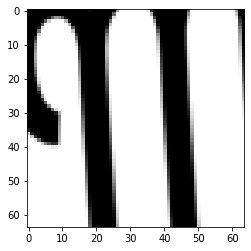

In [23]:
plt.imshow(x[100])

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import accuracy, categorical_accuracy

model = Sequential()

model.add(Conv2D(2, (3, 3), input_shape = x.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(4, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(units = 85, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x, y, batch_size = 2, epochs = 20, validation_split = 0.2)

Epoch 1/20
704/704 [==============================] - 9s 12ms/step - loss: 2.6041 - accuracy: 0.4183 - val_loss: 1.1231 - val_accuracy: 0.6932
Epoch 2/20
704/704 [==============================] - 8s 12ms/step - loss: 0.5473 - accuracy: 0.8274 - val_loss: 0.8598 - val_accuracy: 0.7756
Epoch 3/20
704/704 [==============================] - 8s 11ms/step - loss: 0.3554 - accuracy: 0.8786 - val_loss: 0.8417 - val_accuracy: 0.7614
Epoch 4/20
704/704 [==============================] - 8s 12ms/step - loss: 0.2680 - accuracy: 0.8999 - val_loss: 0.6852 - val_accuracy: 0.8097
Epoch 5/20
704/704 [==============================] - 8s 11ms/step - loss: 0.1944 - accuracy: 0.9268 - val_loss: 0.8201 - val_accuracy: 0.8068
Epoch 6/20
704/704 [==============================] - 8s 11ms/step - loss: 0.1903 - accuracy: 0.9290 - val_loss: 0.7750 - val_accuracy: 0.7926
Epoch 7/20
704/704 [==============================] - 8s 11ms/step - loss: 0.1733 - accuracy: 0.9311 - val_loss: 0.7412 - val_accuracy: 0.8182

In [25]:
print("->", 0)
history = model.fit(x, y, batch_size=2, epochs=2, validation_split=0.1)

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

for i in range(1, 20):
  z = list(zip(x,y))
  random.shuffle(z)
  del x, y
  x, y = zip(*z)
  x = np.asarray(x).astype(float)
  y = np.asarray(y)
  del z

  print("->", i)
  history = model.fit(x, y, batch_size=2, epochs=2, validation_split=0.1)
  
  accuracy = np.concatenate((accuracy, history.history['accuracy']), axis=0)
  val_accuracy = np.concatenate((val_accuracy, history.history['val_accuracy']), axis=0)
  loss = np.concatenate((loss, history.history['loss']), axis=0)
  val_loss = np.concatenate((val_loss, history.history['val_loss']), axis=0)

-> 0
Epoch 1/2
803/803 [==============================] - 6s 7ms/step - loss: 1.8290 - accuracy: 0.5548 - val_loss: 0.4530 - val_accuracy: 0.8156
Epoch 2/2
803/803 [==============================] - 5s 6ms/step - loss: 0.3804 - accuracy: 0.8649 - val_loss: 0.3184 - val_accuracy: 0.8883
-> 1
Epoch 1/2
803/803 [==============================] - 5s 6ms/step - loss: 0.2763 - accuracy: 0.8892 - val_loss: 0.2486 - val_accuracy: 0.8939
Epoch 2/2
803/803 [==============================] - 5s 6ms/step - loss: 0.2468 - accuracy: 0.8979 - val_loss: 0.2210 - val_accuracy: 0.9106
-> 2
Epoch 1/2
803/803 [==============================] - 10s 12ms/step - loss: 0.2138 - accuracy: 0.9060 - val_loss: 0.1767 - val_accuracy: 0.9106
Epoch 2/2
803/803 [==============================] - 6s 7ms/step - loss: 0.1925 - accuracy: 0.9166 - val_loss: 0.2280 - val_accuracy: 0.9162
-> 3
Epoch 1/2
803/803 [==============================] - 5s 6ms/step - loss: 0.1799 - accuracy: 0.9203 - val_loss: 0.1414 - val_accuracy

In [30]:
model.save_weights("Model_Jawa_FIX.h5")

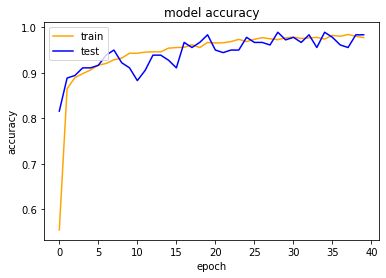

In [26]:
plt.plot(accuracy, 'orange', val_accuracy, 'blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

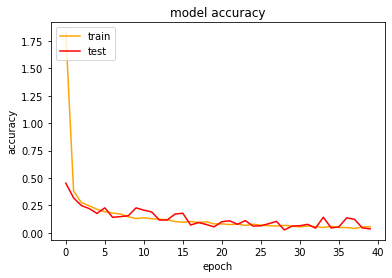

In [27]:
plt.plot(loss, 'orange', val_loss, 'red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(x[-1000:])
y_pred = np.argmax(y_pred, axis=1)

print(accuracy_score(y_pred, y[-1000:]))
cm = confusion_matrix(y_pred, y[-1000:])
print(cm)

print(classification_report(y_pred, y[-1000:]))

32/32 [==============================] - 1s 22ms/step
0.984
[[ 8  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        17
           6       0.62      1.00      0.76         8
           7       0.93      1.00      0.96        13
           8       1.00      0.94      0.97        16
           9       0.92      1.00      0.96        12
          10       1.00      1.00      1.00        13
          11       1.00      1.00      1.00        13
          12       1.00      0.65      0.79        23
          13       1.00    

In [ ]:
daftar_huruf[62]

'/content/drive/MyDrive/AKSARA/Jawa/JAVANESE_PADA_ADEG'

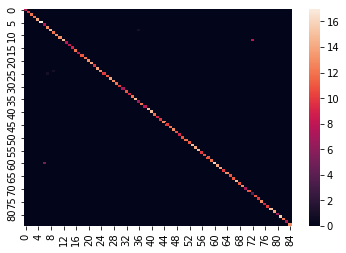

In [29]:
import seaborn as sns

sns.heatmap(cm)